<a name="01-one-way-anova"></a>

# Explaining the Python Code
```{contents}
```
This Python code is using several libraries to create a dataset, visualize it, and perform a one-way ANOVA analysis. Let's break it down:




## Importing Libraries

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
```

The code starts by importing necessary libraries:

- `pandas` for data manipulation and analysis.
- `numpy` for numerical operations.
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `plotly.express` for interactive data visualization.
- `statsmodels.api` and `statsmodels.formula.api.ols` for statistical modeling.
- `scipy.stats` for statistical functions.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

## Creating a DataFrame

```python
df = pd.DataFrame({'Group': np.random.choice(['A', 'B', 'C'], size=100),
                    'Score': np.random.randint(0, 100, size=100)})
```

This code creates a pandas DataFrame with two columns: 'Group' and 'Score'. The 'Group' column is populated with random choices from the list ['A', 'B', 'C'], and the 'Score' column is populated with a normal distribution with a mean of 50 and a standard deviation of 10. The size parameter specifies that 100 values should be generated for each column.



In [2]:
df = pd.DataFrame({'Group': np.random.choice(['A', 'B', 'C'], size=100),
                    'Score': np.random.normal(loc=50, scale=10, size=100)})                  
                    

## Plotting a Boxplot

```python
sns.boxplot(x='Group', y='Score', data=df)
plt.show()
```

This code uses seaborn's `boxplot` function to create a boxplot of the scores for each group. The `plt.show()` function is used to display the plot.




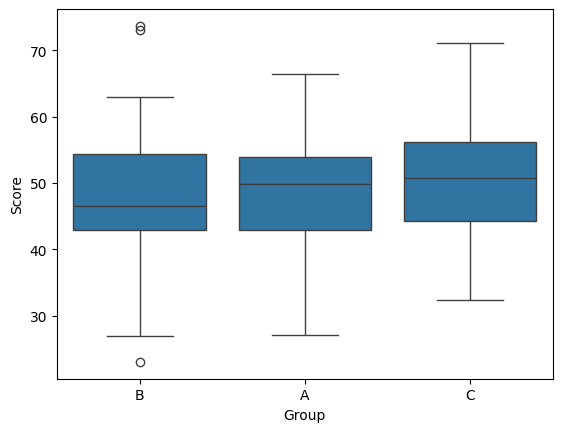

In [3]:
sns.boxplot(x='Group', y='Score',  data=df)
plt.show()

## Plotting a Box Plot with Plotly

```python
fig = px.box(df, x='Group', y='Score', color='Group',points='all')
fig.show()
```

This code uses Plotly Express to create an interactive boxplot of the scores for each group. The `fig.show()` function is used to display the plot. Nevertheless, this environment does not support Plotly. Look for a in-deep information in the following link: [Plotly for Python](https://plotly.com/python/)



## Adding Linear Regression

```python
model = ols('Score ~ C(Group)', data=df).fit()
```

This code creates a linear regression model using the 'Group' column as the independent variable and the 'Score' column as the dependent variable. The `C(Group)` part of the formula specifies that 'Group' is a categorical variable.



In [4]:
model = ols('Score ~ C(Group)', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Sun, 11 Feb 2024   Prob (F-statistic):              0.689
Time:                        19:35:19   Log-Likelihood:                -369.34
No. Observations:                 100   AIC:                             744.7
Df Residuals:                      97   BIC:                             752.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.3296      1.718     28.706

## The ANOVA Test

```python
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
```
This code applies the ANOVA test, considering the linear relationship described during the linear regression model. After that, the code generates a table summarizing the information regarding the Sum Squared, Degree of Freedom, Mean Squared, and the test value (in this case, the p-value). The decision-maker sets the threshold for accepting or rejecting the null hypothesis.

In [5]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


               sum_sq    df         F    PR(>F)
C(Group)    72.958325   2.0  0.374345  0.688728
Residual  9452.442672  97.0       NaN       NaN
